## mRKS method

Please check the original paper:\
\[1\] [Ryabinkin, Kohut and Staroverov, PRL 115, 083001 (2015)](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.115.083001) \
\[2\] [Ospadov, Ryabinkin and Staroverov, J. Chem. Phys. 146, 084103 (2017)](https://doi.org/10.1063/1.4975990) \
\[3\] [Staroverov, Ospadov, Advances in Quantum Chemistry, Volume 79 (2019)](https://doi.org/10.1016/bs.aiq.2019.04.002).

First, build the input wavefunction using Psi4. Note that currently only Psi4.CIWavefunction supports two-particle density matrices (tpdm). CISD is used in this example.

In [1]:
import psi4
import matplotlib.pyplot as plt
import numpy as np

psi4.set_options({"save_jk" : True})
psi4.set_memory(int(2.50e9))
psi4.set_num_threads(4)
psi4.core.clean()

import n2v

In [2]:
Ne = psi4.geometry( 
""" 
0 1
Ne
noreorient
nocom
units bohr
symmetry c1
""" )

psi4.set_options({"reference" : "rhf",
                  "opdm": True,
                  "tpdm": True,
                  'DFT_SPHERICAL_POINTS': 110,  # Usually specify the DFT spherical grid is highly recommended.
                  'DFT_RADIAL_POINTS': 210,  # See [https://psicode.org/psi4manual/master/dft.html] for options.
                 })  # Spin-Restricted

# IMPORTANT NOTE: ONLY psi4.CIWavefunction or RHF is supported.
wfn = psi4.properties("detci/cc-pcvdz", return_wfn=True, molecule=Ne, properties=["dipole"])[1]

ine = n2v.Inverter(wfn)

In [3]:
ine.invert("mRKS", opt_max_iter=30, frac_old=0.8, init="scan")

The guide potential is changed to v_hartree.
Memory taken by ERI integral matrix and 2pdm is about: 0.003 GB.
vxchole quadrature double integral starts (20020 points): ...........

Totally 20020 grid points takes 96.28s with max 256 points in a block.
Iter: 1, Density Change: 5.15e-03, Eigenvalue Change: 6.15e+00, Potential Change: 1.83e+00.
Iter: 2, Density Change: 4.69e-05, Eigenvalue Change: 1.44e-01, Potential Change: 1.87e-02.
Iter: 3, Density Change: 1.53e-05, Eigenvalue Change: 2.31e-03, Potential Change: 1.44e-02.
Iter: 4, Density Change: 1.02e-05, Eigenvalue Change: 2.03e-03, Potential Change: 1.25e-02.
Iter: 5, Density Change: 6.88e-06, Eigenvalue Change: 1.88e-03, Potential Change: 1.17e-02.
Iter: 6, Density Change: 4.73e-06, Eigenvalue Change: 1.80e-03, Potential Change: 1.13e-02.
Iter: 7, Density Change: 3.33e-06, Eigenvalue Change: 1.74e-03, Potential Change: 1.12e-02.
Iter: 8, Density Change: 2.43e-06, Eigenvalue Change: 1.70e-03, Potential Change: 1.11e-02.
Iter: 9, Den

In [4]:
x,y,z,_ = ine.Vpot.get_np_xyzw()

mask = np.bitwise_and(np.isclose(y, 0), np.isclose(z,0))
order = np.argsort(x[mask])

x_plot = x[mask][order]
vxc_plot = ine.grid.vxc[mask][order]
np.min(vxc_plot)

-7.908718864015423

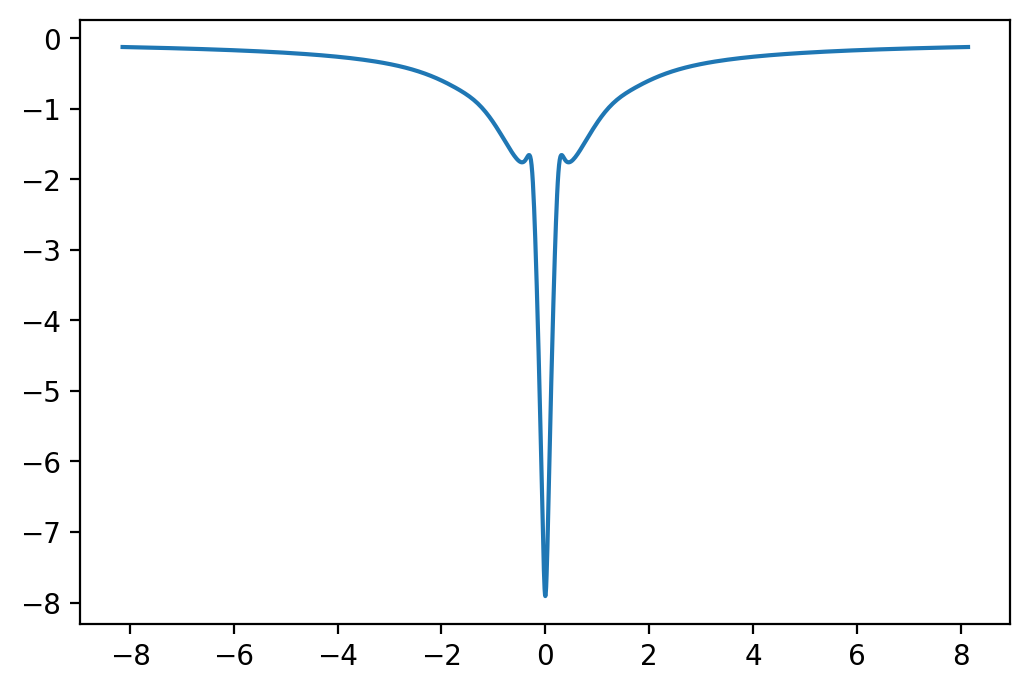

In [5]:
fig, axes = plt.subplots(dpi=200)
axes.plot(x_plot, vxc_plot, label="vxc")

If a user specified grid is needed (which is usually the case), one should give the grid infomation before the calculation, as shown following:

In [6]:
x = np.linspace(-5,5,4001)
y = [0]
z = [0]
grid, shape = ine.generate_grids(x,y,z)
grid.shape

(3, 4001)

In [7]:
v = ine.invert("mRKS", opt_max_iter=30, frac_old=0.7, vxc_grid=grid,
              init="scan" # Here set init="continue" should be better
              )

The guide potential is changed to v_hartree.
Memory taken by ERI integral matrix and 2pdm is about: 0.003 GB.
Iter: 1, Density Change: 5.15e-03, Eigenvalue Change: 6.15e+00, Potential Change: 1.83e+00.
Iter: 2, Density Change: 4.69e-05, Eigenvalue Change: 1.44e-01, Potential Change: 1.87e-02.
Iter: 3, Density Change: 2.29e-05, Eigenvalue Change: 3.46e-03, Potential Change: 1.28e-02.
Iter: 4, Density Change: 1.15e-05, Eigenvalue Change: 2.90e-03, Potential Change: 1.15e-02.
Iter: 5, Density Change: 6.04e-06, Eigenvalue Change: 2.69e-03, Potential Change: 1.12e-02.
Iter: 6, Density Change: 3.48e-06, Eigenvalue Change: 2.58e-03, Potential Change: 1.11e-02.
Iter: 7, Density Change: 2.29e-06, Eigenvalue Change: 2.50e-03, Potential Change: 1.10e-02.
Iter: 8, Density Change: 1.74e-06, Eigenvalue Change: 2.43e-03, Potential Change: 1.09e-02.
Iter: 9, Density Change: 1.48e-06, Eigenvalue Change: 2.37e-03, Potential Change: 1.08e-02.
Iter: 10, Density Change: 1.35e-06, Eigenvalue Change: 2.32e-0

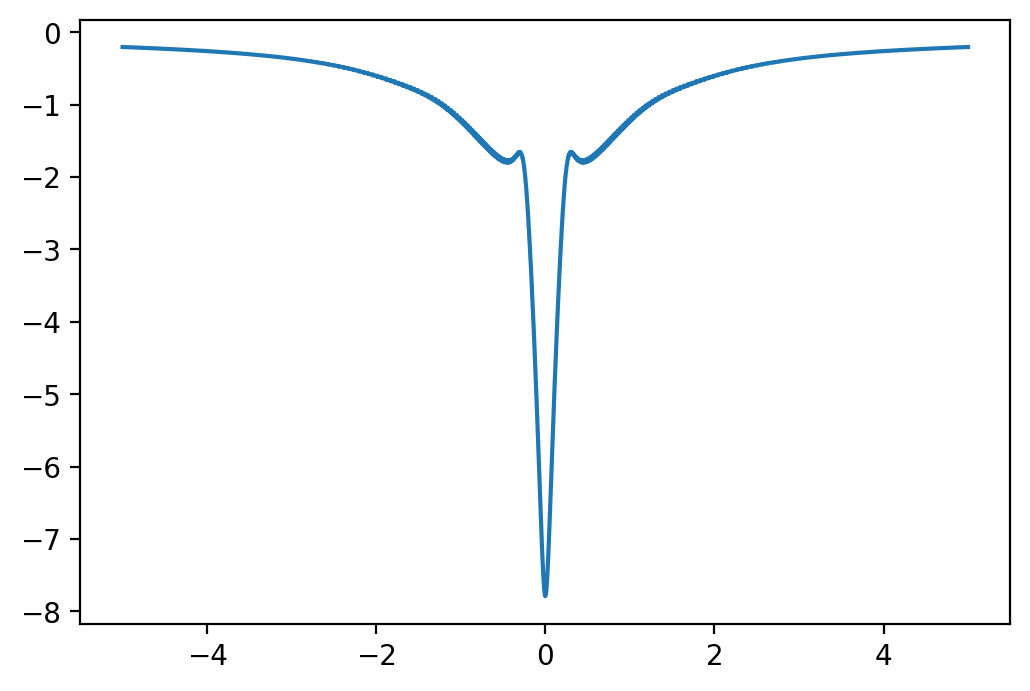

In [8]:
fig, ax = plt.subplots(dpi=200)
ax.plot(x, ine.grid.vxc)

In [9]:
ine.grid.vxc.min()

-7.789128120833423